# Chapitre 6 : Les pandas et l’analyse des données financières
Apprenez à utiliser pandas pour l’analyse des données financières et récupérez des données de marché réelles à l’aide de yfinance et pandas_datareader.

## Objectifs d’apprentissage :
- Maîtriser les opérations DataFrame pandas pour les données financières
- Apprenez à récupérer des données de marché réelles à l’aide d’yfinance
- Comprendre l’analyse de séries temporelles avec les pandas
- Créez des rapports financiers et des visualisations

## 1. Introduction aux pandas
Comprendre les bases de pandas DataFrame pour les données financières.

In [1]:
import pandas as pd
import numpy as np

# Create a DataFrame with stock data
data = {
    'Symbol': ['AAPL', 'MSFT', 'GOOGL'],
    'Price': [190.50, 375.00, 140.50],
    'Shares': [100, 50, 75]
}
df = pd.DataFrame(data)

# Calculate position values
df['Position Value'] = df['Price'] * df['Shares']

# Basic statistics
print(df.describe())  # Summary statistics
print(df.groupby('Symbol').sum())  # Group by symbol

            Price  Shares  Position Value
count    3.000000     3.0        3.000000
mean   235.333333    75.0    16112.500000
std    123.511470    25.0     4830.421177
min    140.500000    50.0    10537.500000
25%    165.500000    62.5    14643.750000
50%    190.500000    75.0    18750.000000
75%    282.750000    87.5    18900.000000
max    375.000000   100.0    19050.000000
        Price  Shares  Position Value
Symbol                               
AAPL    190.5     100         19050.0
GOOGL   140.5      75         10537.5
MSFT    375.0      50         18750.0


## 2. Récupération des données du marché
Utiliser yfinance et pandas_datareader pour obtenir des données de marché réelles.

In [25]:
import yfinance as yf

# Télécharger données Apple (sans group_by pour simplifier)
aapl = yf.download('AAPL',
                   start='2023-01-01',
                   end='2023-12-31')

print("Head disponibles:", aapl.head())

C:\Users\wilfr\AppData\Local\Temp\ipykernel_39796\1502529635.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download('AAPL',
[*********************100%***********************]  1 of 1 completed

Head disponibles: Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.330650  129.079567  122.443165  128.468194  112117500
2023-01-04  124.602715  126.870731  123.340517  125.125343   89113600
2023-01-05  123.281342  125.993097  123.024963  125.361998   80962700
2023-01-06  127.817368  128.478048  123.153152  124.257579   87754700
2023-01-09  128.340012  131.554685  128.083633  128.655569   70790800


In [26]:
# Utiliser 'Adj Close' si présent, sinon 'Close'
col = 'Adj Close' if 'Adj Close' in aapl.columns else 'Close'

# Calcul des rendements journaliers
aapl['Returns'] = aapl[col].pct_change()
print("Calcul des rendements journaliers: ",aapl[['Returns']].head())

Calcul des rendements journaliers:  Price        Returns
Ticker              
Date                
2023-01-03       NaN
2023-01-04  0.010314
2023-01-05 -0.010605
2023-01-06  0.036794
2023-01-09  0.004089


In [29]:
# Télécharger plusieurs actions
tickers = ['AAPL', 'MSFT', 'GOOGL']
portfolio = yf.download(tickers,
                        start='2023-01-01',
                        end='2023-12-31')

print("Head portfolio:", portfolio.head())

C:\Users\wilfr\AppData\Local\Temp\ipykernel_39796\1594843477.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  portfolio = yf.download(tickers,
[*********************100%***********************]  3 of 3 completed

Head portfolio: Price            Close                               High             \
Ticker            AAPL      GOOGL        MSFT        AAPL      GOOGL   
Date                                                                   
2023-01-03  123.330650  88.588707  234.423584  129.079567  90.507201   
2023-01-04  124.602715  87.554909  224.169113  126.870731  90.109587   
2023-01-05  123.281342  85.686111  217.525269  125.993097  87.047947   
2023-01-06  127.817368  86.819313  220.088882  128.478048  87.167233   
2023-01-09  128.340012  87.495255  222.231766  131.554685  89.513159   

Price                          Low                               Open  \
Ticker            MSFT        AAPL      GOOGL        MSFT        AAPL   
Date                                                                    
2023-01-03  240.460787  122.443165  87.992278  232.290496  128.468194   
2023-01-04  227.857961  123.340517  86.749732  221.096696  125.125343   
2023-01-05  222.652495  123.024963  85.387

In [30]:
# Sélectionner 'Adj Close' ou 'Close' pour toutes les actions
if 'Adj Close' in portfolio.columns:
    portfolio = portfolio['Adj Close']
else:
    portfolio = portfolio['Close']

# Matrice de corrélation
correlation = portfolio.corr()
print("\nMatrice de corrélation:")
print(correlation)


Matrice de corrélation:
Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    1.000000  0.854650  0.948934
GOOGL   0.854650  1.000000  0.899318
MSFT    0.948934  0.899318  1.000000


## 3. Analyse des séries chronologiques
Travailler avec des séries chronologiques financières chez les pandas.

In [ ]:
# Resample data to monthly frequency
monthly = aapl['Close'].resample('M').last()

# Calculate moving averages
aapl['MA50'] = aapl['Close'].rolling(window=50).mean()
aapl['MA200'] = aapl['Close'].rolling(window=200).mean()


# Generate trading signals
aapl['Signal'] = np.where(aapl['MA50'] > aapl['MA200'], 1, -1)

# Calculate returns by time period
returns = {
    'Daily': aapl['Returns'].mean(),
    'Monthly': aapl['Returns'].resample('M').mean(),
    'Annual': aapl['Returns'].resample('Y').mean()
}

In [ ]:
monthly.head() # Afficher les données mensuelles

Ticker,AAPL
Date,
2023-01-31,142.283356
2023-02-28,145.581909
2023-03-31,162.854965
2023-04-30,167.575699
2023-05-31,175.293991


In [33]:
print("moving averages and signals:", aapl[['MA50', 'MA200', 'Signal']].dropna().head())

moving averages and signals: Price             MA50       MA200 Signal
Ticker                                   
Date                                     
2023-10-18  175.979486  167.096639      1
2023-10-19  175.930174  167.348776      1
2023-10-20  175.834116  167.581778      1
2023-10-23  175.739245  167.821980      1
2023-10-24  175.620013  168.041682      1


In [40]:
print("returns:", returns['Daily'])

returns: 0.0018349270421578472


In [41]:
print(returns['Monthly'].head())

Date
2023-01-31    0.007633
2023-02-28    0.001336
2023-03-31    0.004977
2023-04-30    0.001580
2023-05-31    0.002124
Freq: M, Name: Returns, dtype: float64


In [42]:
print(returns['Annual'].head())

Date
2023-12-31    0.001835
Freq: A-DEC, Name: Returns, dtype: float64


## Exercices:
1. Créez un tableau de bord de données de marché :
- Télécharger les données de plusieurs actions à l’aide de yfinance
- Calculez les rendements quotidiens et la volatilité
- Générer un résumé des performances à l’aide de pandas
2. Mettre en place un système d’analyse technique :
- Calculer diverses moyennes mobiles
- Générer des signaux de trading
- Performances de la stratégie de backtest
3. Construire un outil d’analyse de portefeuille :
- Suivez les performances de plusieurs actions
- Calculer les statistiques du portefeuille
- Générer des métriques de risque (Bêta, Ratio de Sharpe)
4. Créez un analyseur de sentiment du marché :
- Télécharger les données de l’indice (S&P 500, NASDAQ)
- Calculer les indicateurs d’étendue du marché
- Générer un rapport sur la santé du marché
5. Développer un outil d’analyse des dividendes :
- Télécharger l’historique des dividendes
- Calculer les taux de croissance des dividendes
- Projeter les revenus de dividendes futurs
6. Créez une analyse de rotation sectorielle :
- Télécharger les données des ETF sectoriels
- Comparer les performances sectorielles
- Identifier les tendances du secteur

In [57]:
#1. Créez un tableau de bord de données de marché :
#- Télécharger les données de plusieurs actions à l’aide de yfinance
#- Calculez les rendements quotidiens et la volatilité
#- Générer un résumé des performances à l’aide de pandas
import yfinance as yf
import pandas as pd

# Télécharger données de plusieurs actions
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]
data = yf.download(tickers, 
                   start="2023-01-01", 
                   end="2023-12-31")
print(data.head())

C:\Users\wilfr\AppData\Local\Temp\ipykernel_39796\3480491780.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers,
[*********************100%***********************]  4 of 4 completed

Price            Close                                          High  \
Ticker            AAPL       AMZN      GOOGL        MSFT        AAPL   
Date                                                                   
2023-01-03  123.330650  85.820000  88.588707  234.423584  129.079567   
2023-01-04  124.602715  85.139999  87.554909  224.169113  126.870731   
2023-01-05  123.281342  83.120003  85.686111  217.525269  125.993097   
2023-01-06  127.817368  86.080002  86.819313  220.088882  128.478048   
2023-01-09  128.340012  87.360001  87.495255  222.231766  131.554685   

Price                                                Low             \
Ticker           AMZN      GOOGL        MSFT        AAPL       AMZN   
Date                                                                  
2023-01-03  86.959999  90.507201  240.460787  122.443165  84.209999   
2023-01-04  86.980003  90.109587  227.857961  123.340517  83.360001   
2023-01-05  85.419998  87.047947  222.652495  123.024963  83.070000 

In [ ]:
# Calcul des rendements journaliers
returns = data.pct_change().dropna()
print(returns.head())

Price          Close                                    High            \
Ticker          AAPL      AMZN     GOOGL      MSFT      AAPL      AMZN   
Date                                                                     
2023-01-05 -0.010605 -0.023726 -0.021344 -0.029638 -0.006918 -0.017935   
2023-01-06  0.036794  0.035611  0.013225  0.011785  0.019723  0.011473   
2023-01-09  0.004089  0.014870  0.007786  0.009736  0.023947  0.035648   
2023-01-10  0.004456  0.028732  0.004544  0.007617 -0.016116  0.007935   
2023-01-11  0.021112  0.058084  0.035060  0.030238  0.017142  0.056215   

Price                                Low            ...      Open            \
Ticker         GOOGL      MSFT      AAPL      AMZN  ...      AAPL      AMZN   
Date                                                ...                       
2023-01-05 -0.033977 -0.022845 -0.002558 -0.003479  ...  0.001891 -0.014096   
2023-01-06  0.001370 -0.007866  0.001042 -0.019742  ... -0.008810 -0.026954   
2023-01-09  

In [ ]:
# Calcul de la volatilité (écart-type annualisé)
volatility = returns.std() * (252**0.5)  # 252 jours de trading par an
volatility.name = 'Annualized Volatility'
print("\nVolatilité annualisée moyenne par Ticker:")
print(volatility.groupby(["Ticker"]).mean())



Volatilité annualisée:
Ticker
AAPL     1.004367
AMZN     1.246073
GOOGL    1.286735
MSFT     1.313039
Name: Annualized Volatility, dtype: float64


In [ ]:
# Résumé des performances
performance_summary = pd.DataFrame({
    "Dernier prix": data.iloc[-1],
    "Rendement total (%)": (data.iloc[-1] / data.iloc[0] - 1) * 100,
    "Rendement moyen quotidien (%)": returns.mean() * 100,
    "Volatilité annualisée (%)": volatility * 100
})

print("\nRésumé des performances :")
print(performance_summary.round(2))


Résumé des performances :
                      Dernier prix  Rendement total (%)  \
Price         Ticker                                      
Close         AAPL          190.91                54.80   
              AMZN          151.94                77.04   
              GOOGL         138.86                56.74   
              MSFT          371.21                58.35   
Daily Returns                 0.06                  NaN   
High          AAPL          192.77                49.34   
              AMZN          153.89                76.97   
              GOOGL         139.52                54.16   
              MSFT          372.31                54.83   
Low           AAPL          190.12                55.27   
              AMZN          151.03                79.35   
              GOOGL         137.95                56.78   
              MSFT          368.68                58.72   
Open          AAPL          192.27                49.67   
              AMZN          1

C:\Users\wilfr\AppData\Local\Temp\ipykernel_39796\171941930.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


      Rendement total Buy&Hold (%)  Rendement total Stratégie (%)  \
AAPL                          54.8                          10.58   

      Volatilité Buy&Hold (%)  Volatilité Stratégie (%)  
AAPL                    19.95                     16.85  


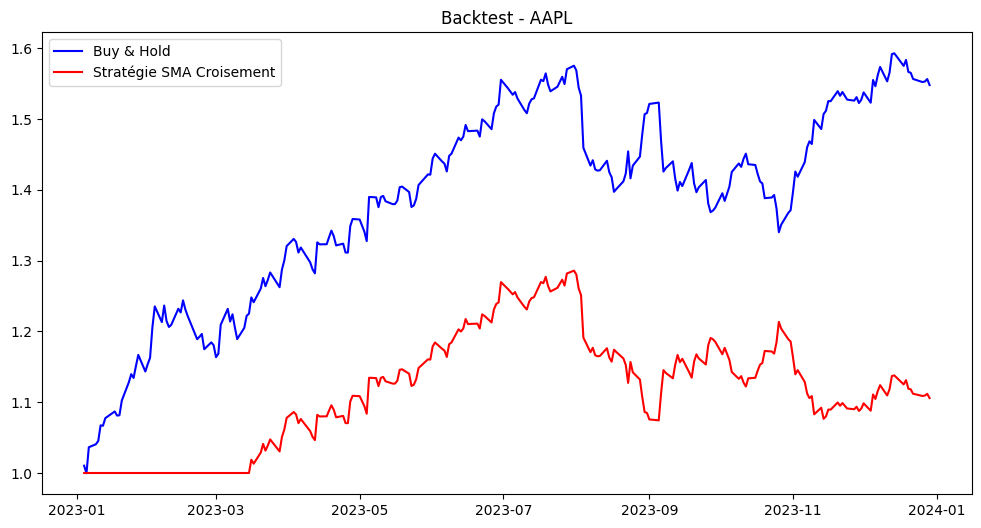

In [58]:
#2. Mettre en place un système d’analyse technique :
#- Calculer diverses moyennes mobiles
#- Générer des signaux de trading
#- Performances de la stratégie de backtest

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Télécharger les données
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")

# Calculer les moyennes mobiles
data["SMA_20"] = data["Close"].rolling(window=20).mean()
data["SMA_50"] = data["Close"].rolling(window=50).mean()

# Générer les signaux de trading
# 1 = Acheter, -1 = Vendre, 0 = Rien
data["Signal"] = 0
data.loc[data["SMA_20"] > data["SMA_50"], "Signal"] = 1
data.loc[data["SMA_20"] < data["SMA_50"], "Signal"] = -1

# Décaler le signal pour éviter le biais de look-ahead
data["Position"] = data["Signal"].shift(1).fillna(0)

# Backtest de la stratégie
data["Returns"] = data["Close"].pct_change()
data["Strategy"] = data["Position"] * data["Returns"]

# Cumul des rendements
cumulative_buy_hold = (1 + data["Returns"]).cumprod()
cumulative_strategy = (1 + data["Strategy"]).cumprod()

# Résumé des performances
performance_summary = pd.DataFrame({
    "Rendement total Buy&Hold (%)": (cumulative_buy_hold.iloc[-1] - 1) * 100,
    "Rendement total Stratégie (%)": (cumulative_strategy.iloc[-1] - 1) * 100,
    "Volatilité Buy&Hold (%)": data["Returns"].std() * (252**0.5) * 100,
    "Volatilité Stratégie (%)": data["Strategy"].std() * (252**0.5) * 100,
}, index=[ticker])

print(performance_summary.round(2))

# Visualisation
plt.figure(figsize=(12,6))
plt.plot(cumulative_buy_hold, label="Buy & Hold", color="blue")
plt.plot(cumulative_strategy, label="Stratégie SMA Croisement", color="red")
plt.legend()
plt.title(f"Backtest - {ticker}")
plt.show()


C:\Users\wilfr\AppData\Local\Temp\ipykernel_39796\3696037343.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2023-01-01", end="2023-12-31")["Close"]
[*********************100%***********************]  4 of 4 completed
C:\Users\wilfr\AppData\Local\Temp\ipykernel_39796\3696037343.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2023-01-01", end="2023-12-31")["Close"].pct_change().dropna()
[*********************100%***********************]  1 of 1 completed



Résumé du portefeuille :
              Rendement annuel (%)  Volatilité annuelle (%)  Bêta (vs S&P500)  \
Portefeuille                 52.34                    22.02               1.3   

              Ratio de Sharpe  
Portefeuille             2.38  


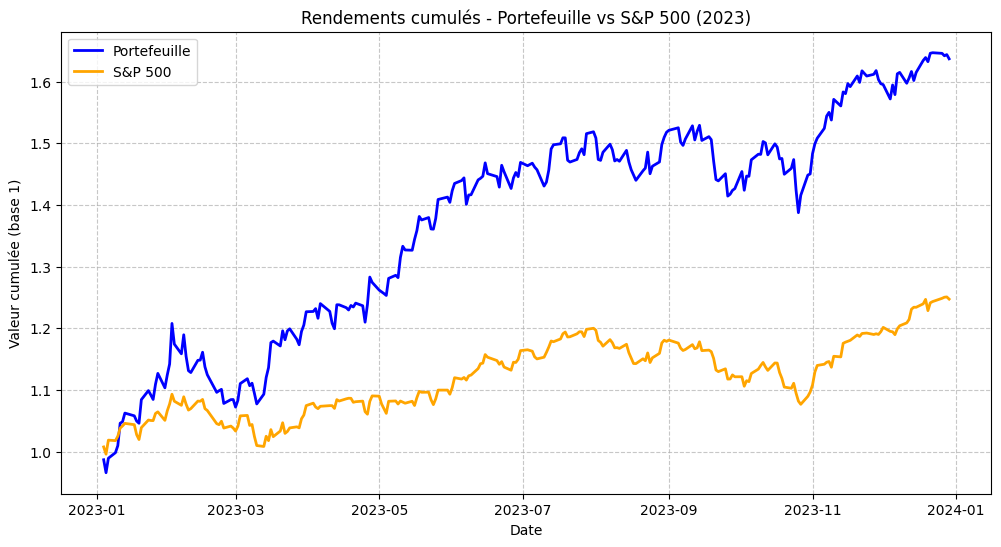

In [ ]:
#3. Construire un outil d’analyse de portefeuille :
#- Suivez les performances de plusieurs actions
#- Calculer les statistiques du portefeuille
#- Générer des métriques de risque (Bêta, Ratio de Sharpe)

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Définir le portefeuille
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]
weights = np.array([0.25, 0.25, 0.25, 0.25])  # pondération égale

# Télécharger les données (Close au lieu de Adj Close)
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")["Close"]

# Calcul des rendements journaliers
returns = data.pct_change().dropna()

# Rendement du portefeuille (pondération)
portfolio_returns = (returns * weights).sum(axis=1)

# Statistiques du portefeuille
annual_return = portfolio_returns.mean() * 252
annual_volatility = portfolio_returns.std() * np.sqrt(252)

# Télécharger données du marché (S&P 500, Close aussi)
sp500 = yf.download("^GSPC", start="2023-01-01", end="2023-12-31")["Close"].pct_change().dropna()

# Aligner les dates
aligned = pd.concat([portfolio_returns, sp500], axis=1, join="inner")
aligned.columns = ["Portfolio", "SP500"]

# Calcul du Bêta avec les données alignées
cov_matrix = np.cov(aligned["Portfolio"], aligned["SP500"])
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

# Ratio de Sharpe (taux sans risque supposé = 0)
sharpe_ratio = annual_return / annual_volatility

# Résumé
summary = pd.DataFrame({
    "Rendement annuel (%)": [annual_return * 100],
    "Volatilité annuelle (%)": [annual_volatility * 100],
    "Bêta (vs S&P500)": [beta],
    "Ratio de Sharpe": [sharpe_ratio]
}, index=["Portefeuille"])

print("\nRésumé du portefeuille :")
print(summary.round(2))

# Graphe des rendements cumulés
cumulative_portfolio = (1 + aligned["Portfolio"]).cumprod()
cumulative_sp500 = (1 + aligned["SP500"]).cumprod()

plt.figure(figsize=(12,6))
plt.plot(cumulative_portfolio, label="Portefeuille", color="blue", linewidth=2)
plt.plot(cumulative_sp500, label="S&P 500", color="orange", linewidth=2)
plt.title("Rendements cumulés - Portefeuille vs S&P 500 (2023)")
plt.xlabel("Date")
plt.ylabel("Valeur cumulée (base 1)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()



In [ ]:
#4. Créez un analyseur de sentiment du marché :
#- Télécharger les données de l’indice (S&P 500, NASDAQ)
#- Calculer les indicateurs d’étendue du marché
#- Générer un rapport sur la santé du marché
import yfinance as yf
import pandas as pd
import numpy as np

# Télécharger les indices
indices = ["^GSPC", "^IXIC"]  # S&P 500 et NASDAQ
data = yf.download(indices, start="2023-01-01", end="2023-12-31")["Close"]

# Calcul des rendements quotidiens
returns = data.pct_change().dropna()

# Indicateurs d'étendue du marché
# Moyenne des rendements quotidiens (haussier ou baissier)
avg_daily_return = returns.mean()

# Direction du marché (pourcentage de jours positifs)
market_sentiment = (returns > 0).sum() / len(returns) * 100

# SMA 50 jours pour indicateur technique
sma_50 = data.rolling(window=50).mean()
above_sma = (data > sma_50).sum() / len(data) * 100

# Générer un rapport de santé du marché
report = pd.DataFrame({
    "Rendement moyen quotidien (%)": avg_daily_return * 100,
    "Pourcentage de jours positifs (%)": market_sentiment,
    "Pourcentage au-dessus SMA50 (%)": above_sma
})

print("\n=== Rapport de santé du marché ===")
print(report.round(2))

# Analyse qualitative simple
for index in indices:
    if avg_daily_return[index] > 0 and market_sentiment[index] > 50:
        print(f"{index} : Marché haussier 🌟")
    elif avg_daily_return[index] < 0 and market_sentiment[index] < 50:
        print(f"{index} : Marché baissier 📉")
    else:
        print(f"{index} : Marché neutre ⚖️")


C:\Users\wilfr\AppData\Local\Temp\ipykernel_39796\1632451087.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(indices, start="2023-01-01", end="2023-12-31")["Close"]
[*********************100%***********************]  2 of 2 completed


=== Rapport de santé du marché ===
        Rendement moyen quotidien (%)  Pourcentage de jours positifs (%)  \
Ticker                                                                     
^GSPC                            0.09                              55.02   
^IXIC                            0.15                              56.63   

        Pourcentage au-dessus SMA50 (%)  
Ticker                                   
^GSPC                              56.4  
^IXIC                              60.0  
^GSPC : Marché haussier 🌟
^IXIC : Marché haussier 🌟


C:\Users\wilfr\AppData\Local\Temp\ipykernel_39796\9821376.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(indices, start="2023-01-01", end="2023-12-31")["Close"]
[*********************100%***********************]  2 of 2 completed


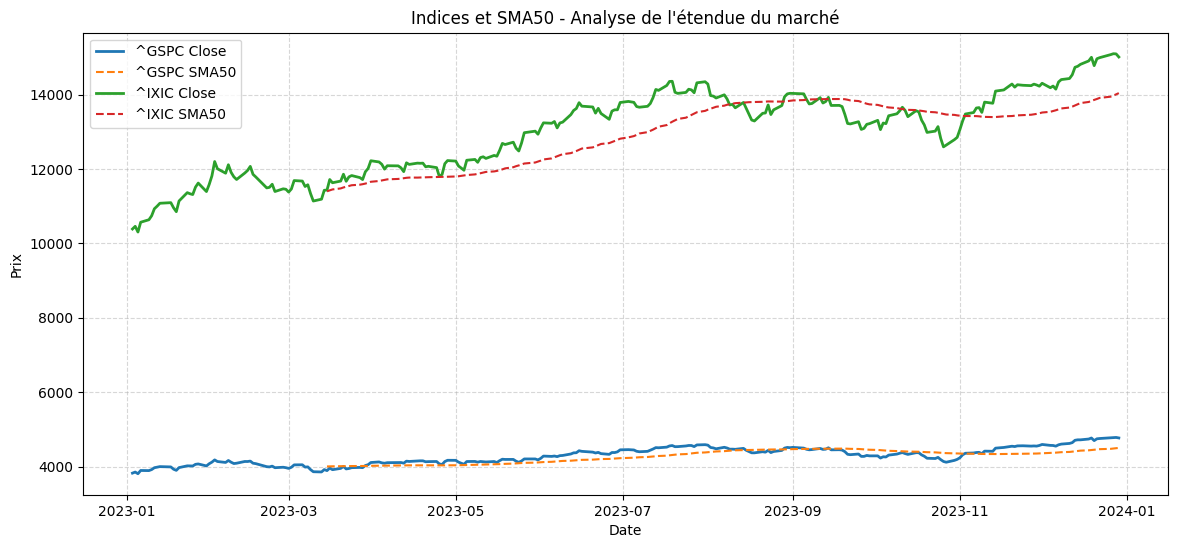

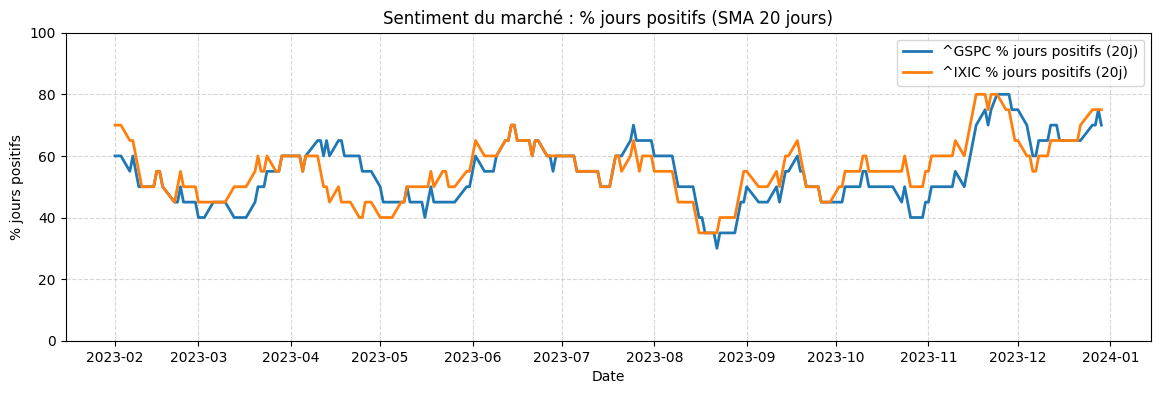

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Télécharger les indices
indices = ["^GSPC", "^IXIC"]  # S&P 500 et NASDAQ
data = yf.download(indices, start="2023-01-01", end="2023-12-31")["Close"]

# Calcul SMA50
sma_50 = data.rolling(window=50).mean()

# Rendement quotidien
returns = data.pct_change().dropna()

# Pourcentage de jours positifs (étendue du marché)
positive_days = (returns > 0).astype(int)

# Graphe principal
plt.figure(figsize=(14,6))
for index in indices:
    plt.plot(data[index], label=f"{index} Close", linewidth=2)
    plt.plot(sma_50[index], label=f"{index} SMA50", linestyle='--')

plt.title("Indices et SMA50 - Analyse de l'étendue du marché")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Graphe de sentiment du marché
plt.figure(figsize=(14,4))
for index in indices:
    plt.plot(positive_days[index].rolling(window=20).mean()*100,
             label=f"{index} % jours positifs (20j)", linewidth=2)

plt.title("Sentiment du marché : % jours positifs (SMA 20 jours)")
plt.xlabel("Date")
plt.ylabel("% jours positifs")
plt.ylim(0,100)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
#5. Développer un outil d’analyse des dividendes :
#- Télécharger l’historique des dividendes
#- Calculer les taux de croissance des dividendes
#- Projeter les revenus de dividendes futurs
import yfinance as yf
import pandas as pd
import numpy as np

# Définir les actions à analyser
tickers = ["AAPL", "MSFT", "JNJ"]

# Nombre d'années pour projection
projection_years = 5

# Fonction pour analyser les dividendes d'une action
def analyze_dividends(ticker):
    stock = yf.Ticker(ticker)
    dividends = stock.dividends
    
    if dividends.empty:
        print(f"{ticker} : pas de dividendes historiques.")
        return None
    
    # Convertir en DataFrame
    df = dividends.to_frame(name="Dividende")
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    # 3. Calcul du taux de croissance annuel moyen (CAGR)
    first_year = df.index.year.min()
    last_year = df.index.year.max()
    
    df_yearly = df.resample('Y').sum()
    start_value = df_yearly.iloc[0,0]
    end_value = df_yearly.iloc[-1,0]
    n_years = last_year - first_year
    
    if n_years == 0:
        growth_rate = 0
    else:
        growth_rate = (end_value / start_value) ** (1/n_years) - 1
    
    # 4. Projection des dividendes futurs
    projections = [end_value * (1 + growth_rate)**i for i in range(1, projection_years+1)]
    
    result = {
        "Ticker": ticker,
        "Dividende actuel": end_value,
        "CAGR (%)": growth_rate*100,
        "Projections": projections
    }
    return result

# Analyser tous les tickers
results = []
for ticker in tickers:
    res = analyze_dividends(ticker)
    if res:
        results.append(res)

# Affichage des résultats
for r in results:
    print(f"\n=== {r['Ticker']} ===")
    print(f"Dividende actuel : {r['Dividende actuel']:.2f} $")
    print(f"Taux de croissance annuel moyen : {r['CAGR (%)']:.2f} %")
    print(f"Projections sur {projection_years} ans : {[round(x,2) for x in r['Projections']]}")



=== AAPL ===
Dividende actuel : 0.77 $
Taux de croissance annuel moyen : 17.31 %
Projections sur 5 ans : [0.9, 1.06, 1.24, 1.46, 1.71]

=== MSFT ===
Dividende actuel : 2.49 $
Taux de croissance annuel moyen : 11.22 %
Projections sur 5 ans : [2.77, 3.08, 3.43, 3.81, 4.24]

=== JNJ ===
Dividende actuel : 2.54 $
Taux de croissance annuel moyen : 11.75 %
Projections sur 5 ans : [2.84, 3.17, 3.54, 3.96, 4.43]


C:\Users\wilfr\AppData\Local\Temp\ipykernel_39796\668750599.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2023-01-01", end="2023-12-31")["Close"]
[*********************100%***********************]  10 of 10 completed



=== Rapport de rotation sectorielle ===
                        Secteur  Performance (%)  Tendance haussière
0                   Technologie        57.511974                True
1  Consommation discrétionnaire        40.476749               False
2                     Industrie        17.877285                True
3                     Matériaux        12.571845                True
4                    Immobilier        11.935647                True
5                       Finance        11.639231                True
6                       Énergie         2.984263                True
7                         Santé         2.360435                True
8          Consommation de base        -0.444282                True
9              Services publics        -7.174787                True


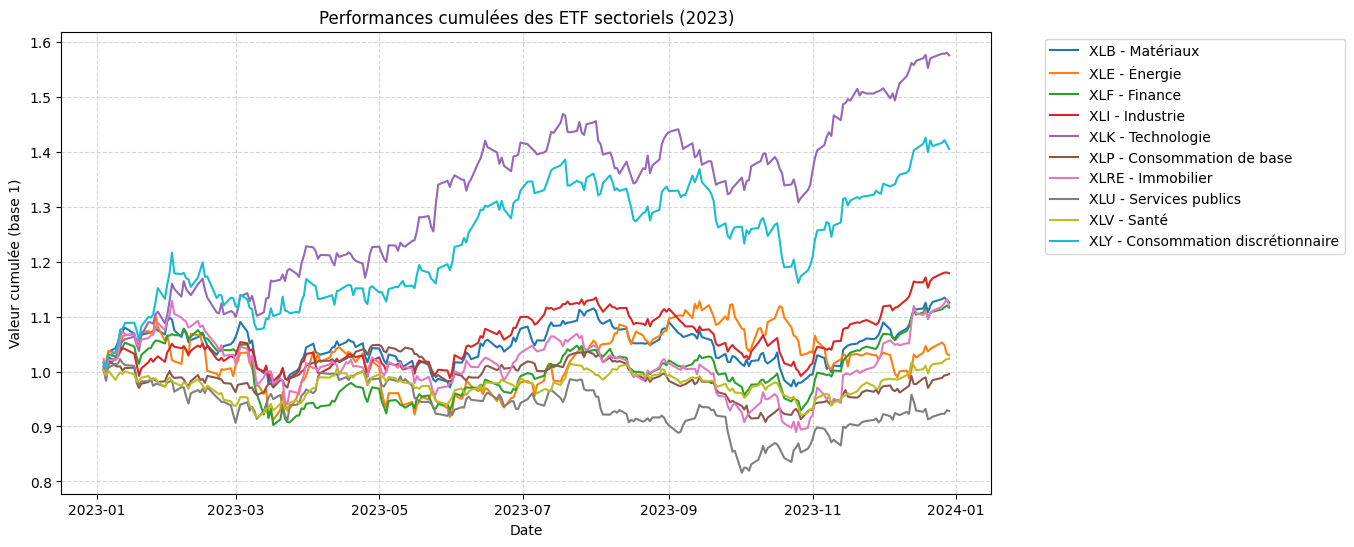

In [ ]:
#6. Créez une analyse de rotation sectorielle :
#- Télécharger les données des ETF sectoriels
#- Comparer les performances sectorielles
#- Identifier les tendances du secteur
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Définir les ETF sectoriels (exemple US sectors)
sector_etfs = {
    "XLK": "Technologie",
    "XLF": "Finance",
    "XLE": "Énergie",
    "XLV": "Santé",
    "XLY": "Consommation discrétionnaire",
    "XLP": "Consommation de base",
    "XLI": "Industrie",
    "XLRE": "Immobilier",
    "XLK": "Technologie",
    "XLU": "Services publics",
    "XLB": "Matériaux"
}

tickers = list(sector_etfs.keys())

# Télécharger les données
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")["Close"]

# Calculer les rendements cumulés
returns = data.pct_change().dropna()
cumulative_returns = (1 + returns).cumprod()

# Performance sur l'année
performance = (cumulative_returns.iloc[-1] - 1) * 100
performance = performance.sort_values(ascending=False)

# Identifier les tendances
# Trend simple : SMA50
sma50 = data.rolling(window=50).mean()
trend = pd.DataFrame(index=data.columns)
trend["Tendance haussière"] = data.iloc[-1] > sma50.iloc[-1]

# Rapport des performances
report = pd.DataFrame({
    "Secteur": [sector_etfs[t] for t in performance.index],
    "Performance (%)": performance.values,
    "Tendance haussière": trend["Tendance haussière"].values
})

print("\n=== Rapport de rotation sectorielle ===")
print(report)

# Graphe des performances cumulées
plt.figure(figsize=(12,6))
for t in cumulative_returns.columns:
    plt.plot(cumulative_returns[t], label=f"{t} - {sector_etfs[t]}")
plt.title("Performances cumulées des ETF sectoriels (2023)")
plt.xlabel("Date")
plt.ylabel("Valeur cumulée (base 1)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
